# Projeto de ICD - Dota 2

#### Alunos:
    Gabriel Henrique
    Matheus Vargas
    Raydan Gaspar

1. Definir Tema e grupo. (2pts) ✔️
2. Discussão com Monitores. (3pts) ✔️
3. Relatório Final. Entregue um relatório sobre os resultados que você levantou para responder às suas perguntas. Sua análise dos dados devem apresentar:
    * Uma caracterização (análise exploratória) inicial dos dados (2pts)
    * Pelo menos, dois testes de hipótese/intervalos de confiança (2pts)
        * Os ICs podem ser apresentados nos resultados de regressão e classificação abaixo.
        * Os testes de hipótese também podem ser utilizados abaixo para comparar modelos.
    * Pelo menos uma regressão (3pts)
    * Pelo menos um algoritmo de aprendizado/classificação (3pts)
4. No seu relatório, você deve apresentar pelo menos os seguintes pontos:
 * Introdução com Motivação e Pergunta de Pesquisa
 * Metodologia
 * Descreva sua base
 * Quais métodos e modelos foram utilizados. Justifique os mesmos.
5. Resultados. Sugiro separar em
 * Caracterização (análise exploratória)
     * Testes de hipótese podem vir aqui.
 * Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)
6. Conclusões
 * Responda sua pergunta pelo menos de forma evidencial.
7. Vídeo no Youtube 5 minutos. Pode ser um vídeo só dos slides!! Com as falas, claro. 5pts.

# Introdução

![](img/dota_logo.png)

# Tema

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| ![](img/minimaps.png)|
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |


## Motivação

## Pergunta de Pesquisa

# Metodologia


# Descrição da base
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Nós optamos por utilizar os mesmos dados que usamos no trbalho final de Introdução a Banco de dados, mas os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo abstrato de dados dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |


# Métodos e modelos utilizados. 
Justifique os mesmos.

# Resultados
### Caracterização (análise exploratória)
Neste trabalho, utilizaremos dados de partidas online do jogo eletrônico Dota 2 realizadas no ano de 2015. Nosso objetivo aqui é fazer uma investigação inicial dos dados, a fim de detectar problemas, necessidade de mais variáveis, falhas na organização e na transformação da informação, assim como obter um entendimento melhor dos dados em si.

O primeiro passo é importar as bibliotecas que vamos utilizar.

In [54]:
import numpy as np # Álgebra linear
import pandas as pd # Dataframes
from matplotlib import pyplot as plt # Plot dos gráficos
import sqlite3 # Acesso e manipulação do banco de dados
import seaborn as sns # # Gráficos

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

Agora precisamos fazer a conexão com o banco de dados, nesse caso estamos utilizando um banco no formato SQLite, que contém todas as tabelas que vamos utilizar.

In [2]:
conn = sqlite3.connect('dota2_2800_partidas.db')
cursor = conn.cursor()

Como se trata de um banco de dados relacional, precisamos verificar quais tabelas existem

In [3]:
df_all_tables = pd.read_sql_query('''SELECT name FROM sqlite_master WHERE type = 'table';''', conn)

print('Número de tabelas na base de dados:', df_all_tables.shape[0])
df_all_tables

Número de tabelas na base de dados: 22


,name
0,xp_reasons
1,lobby_type
2,item_ids
3,gold_reasons
4,order_types
5,game_mode
6,heroes
7,match
8,player
9,chat


Sabemos que as tabelas principais são 'match' e 'player', vamos ver como os dados nessas tabelas estão distribuídos.

Primeiro vamos analisar a tabela das partidas.

In [4]:
df_match = pd.read_sql_query('''SELECT * FROM match''', conn)

print('Shape da tabela match:', df_match.shape)
df_match.describe()

Shape da tabela match: (2856, 11)


,match_id,game_mode,lobby_type,radiant_win,duration,human_players,tower_status_dire,tower_status_radiant,barracks_status_radiant,barracks_status_dire,first_blood_time
count,2.856000e+03,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,2.001266e+09,11.110294,3.314426,0.518207,2420.041667,9.980742,987.857843,1046.056373,35.870798,35.850490,103.202381
std,5.818412e+04,10.124103,3.448782,0.499756,683.281324,0.309760,943.530362,947.662790,29.678094,29.127626,93.890709
min,2.001166e+09,1.000000,0.000000,0.000000,120.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.001218e+09,1.000000,0.000000,0.000000,1992.750000,10.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,2.001263e+09,4.000000,1.000000,1.000000,2374.000000,10.000000,455.000000,1584.000000,51.000000,51.000000,88.000000
75%,2.001315e+09,22.000000,7.000000,1.000000,2844.250000,10.000000,1974.000000,1974.000000,63.000000,63.000000,156.000000
max,2.001401e+09,22.000000,7.000000,1.000000,5382.000000,10.000000,2047.000000,2047.000000,63.000000,63.000000,542.000000


Sabemos que temos XXX partidas no banco, então podemos esperar cerca de 10 vezes esse número na tabela de players, já que em geral são 10 por partida. Podemos notar também que o time Radiant ganha em pouco mais da metade das partidas. Outro dado importante é que existem partidas com bots na base, uma vez que a coluna 'human_players' não tem média igual a 10.

Agora vamos analisar os dados da tabela de jogadores.

In [5]:
df_player = pd.read_sql_query('''SELECT * FROM player''', conn)

pd.set_option('display.max_columns', 23)
print('Shape da tabela player:', df_player.shape)
df_player.describe()

Shape da tabela player: (28505, 23)


,player_match_id,gold_spent,gold,xp_per_min,level,hero_id,hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot
count,2.850500e+04,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.00000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000,28505.000000
mean,2.001266e+09,13506.508332,1830.354885,435.537485,17.505631,51.739028,456.025083,11603.238274,0.06234,1252.982319,123.232661,6.980810,4.771759,7.254341,404.192493,97.505631,99.503245,92.472408,87.609577,80.930644,69.257920,11.062691,66.011226
std,5.814627e+04,6488.119730,1711.936343,148.238260,4.655382,33.264024,1204.339012,6712.852761,0.34761,1749.874046,97.732153,5.395645,5.557336,3.832032,139.117868,71.634543,70.001925,69.368166,68.748821,69.478602,69.529959,6.442428,64.016745
min,2.001166e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.001217e+09,9035.000000,555.000000,330.000000,14.000000,21.000000,0.000000,6692.000000,0.00000,103.000000,51.000000,3.000000,1.000000,4.000000,307.000000,41.000000,41.000000,38.000000,36.000000,23.000000,0.000000,6.000000,2.000000
50%,2.001263e+09,12635.000000,1304.000000,429.000000,18.000000,50.000000,0.000000,10393.000000,0.00000,524.000000,99.000000,6.000000,3.000000,7.000000,385.000000,81.000000,98.000000,79.000000,63.000000,63.000000,46.000000,10.000000,128.000000
75%,2.001315e+09,17050.000000,2661.000000,533.000000,21.000000,79.000000,188.000000,15185.000000,0.00000,1621.000000,169.000000,10.000000,7.000000,10.000000,484.000000,154.000000,152.000000,147.000000,145.000000,139.000000,117.000000,15.000000,130.000000
max,2.001401e+09,63095.000000,17232.000000,1187.000000,25.000000,112.000000,16195.000000,57065.000000,4.00000,13321.000000,1095.000000,43.000000,79.000000,40.000000,2500.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,47.000000,132.000000


Como esperado, temos cerca que 10 jogadores para cada partida (não exatamente por causa da existência de partidas com bots que não contam como jogadores na nossa base). Alguns dados importantes que conseguimos ver são, a média de 'kills', 'deaths' e 'assists' que compoem uma estatística chamada KDA, muito usada no jogo. A quantidade de gold e experiência por minuto também é um dado interessante, que pode interferir no resultado da partida. Também podemos usar a quantidade de last_hits para prever o quão forte um jogador vai ficar e quantos kills ele pode conseguir fazer na partida, por exemplo.

Para condensar os dados em um único dataframe, para ajudar em algumas análises, precisamos encontrar uma forma de unir as tabelas. Sabemos que em cada partida, existem 10 jogadores, 5 em cada um dos dois times, já que vamos ignorar as partidas com bots, então uma maneira de condensar os dados é somando as estatísticas de cada time e adicionar essas estatísticas nas linhas de cada partida, separando as partidas por time, ou seja, onde antes existia uma entrada por partida, agora irá existir uma entrada por time para cada uma das partidas.

In [35]:
df = pd.read_sql_query('''
SELECT *
FROM match AS m
INNER JOIN
    (SELECT player_match_id,REPLACE(REPLACE(sum(player_slot),10,"Radiant"),650,"Dire") Team,sum(gold_spent),sum(gold),sum(xp_per_min),sum(level),sum(hero_healing),sum(hero_damage),sum(tower_damage),sum(last_hits),sum(kills),sum(denies),sum(deaths),sum(gold_per_min),sum(assists)
    FROM player
    WHERE player_slot < 5
    GROUP BY player_match_id
    UNION
    SELECT player_match_id,REPLACE(REPLACE(sum(player_slot),10,"Radiant"),650,"Dire") Team,sum(gold_spent),sum(gold),sum(xp_per_min),sum(level),sum(hero_healing),sum(hero_damage),sum(tower_damage),sum(last_hits),sum(kills),sum(denies),sum(deaths),sum(gold_per_min),sum(assists)
    FROM player
    WHERE player_slot > 5
    GROUP BY player_match_id) AS p
ON m.match_id = p.player_match_id
INNER JOIN
    (SELECT id game_mode_id, name game_mode_name
    FROM game_mode
    ) as gm
ON m.game_mode = gm.game_mode_id
INNER JOIN
    (SELECT id lobby_type_id, name lobby_type_name
    FROM lobby_type 
    ) as lt
ON m.lobby_type = lt.lobby_type_id
WHERE human_players = 10
''', conn)

# Eliminando colunas desnecessárias (indices irrelevantes)
df.drop(['game_mode','lobby_type','game_mode_id','lobby_type_id', 'player_match_id', 'human_players'], axis=1, inplace=True)

pd.set_option('display.max_columns', 50)
df.head(6)

,match_id,radiant_win,duration,tower_status_dire,tower_status_radiant,barracks_status_radiant,barracks_status_dire,first_blood_time,Team,sum(gold_spent),sum(gold),sum(xp_per_min),sum(level),sum(hero_healing),sum(hero_damage),sum(tower_damage),sum(last_hits),sum(kills),sum(denies),sum(deaths),sum(gold_per_min),sum(assists),game_mode_name,lobby_type_name
0,2001166109,1,1819,256,2047,63,48,0,Dire,36735,3570,1549,64,286,48284,77,342,17,6,50,1526,36,game_mode_all_draft,lobby_type_ranked
1,2001166109,1,1819,256,2047,63,48,0,Radiant,66660,9367,2509,82,5768,64645,10105,401,49,18,19,2474,75,game_mode_all_draft,lobby_type_ranked
2,2001166147,1,1717,4,1958,63,3,3,Dire,35855,4110,1566,63,4530,33873,1588,364,14,23,46,1633,26,game_mode_captains_mode,lobby_type_practice
3,2001166147,1,1717,4,1958,63,3,3,Radiant,64020,8413,2379,77,2035,68854,8082,375,46,35,16,2529,91,game_mode_captains_mode,lobby_type_practice
4,2001166161,0,2090,1975,0,0,63,106,Dire,73395,9740,2588,90,1673,46618,12514,575,33,12,26,2476,49,game_mode_all_pick,lobby_type_normal
5,2001166161,0,2090,1975,0,0,63,106,Radiant,39220,4374,1845,75,1584,45128,1066,389,24,22,34,1441,25,game_mode_all_pick,lobby_type_normal


Verificamos rapidamente se existem valores nulos entre os dados

In [7]:
# 0 significa que nenhum valor na tabela é nulo
df.isnull().sum().max()

0

As colunas presentes no dataset são as seguintes

In [8]:
df.columns

Index(['match_id', 'radiant_win', 'duration', 'human_players',
       'tower_status_dire', 'tower_status_radiant', 'barracks_status_radiant',
       'barracks_status_dire', 'first_blood_time', 'Team', 'sum(gold_spent)',
       'sum(gold)', 'sum(xp_per_min)', 'sum(level)', 'sum(hero_healing)',
       'sum(hero_damage)', 'sum(tower_damage)', 'sum(last_hits)', 'sum(kills)',
       'sum(denies)', 'sum(deaths)', 'sum(gold_per_min)', 'sum(assists)',
       'game_mode_name', 'lobby_type_name'],
      dtype='object')

Com esse dataframe em mãos, podemos visualizar algumas estatísticas interessantes das partidas

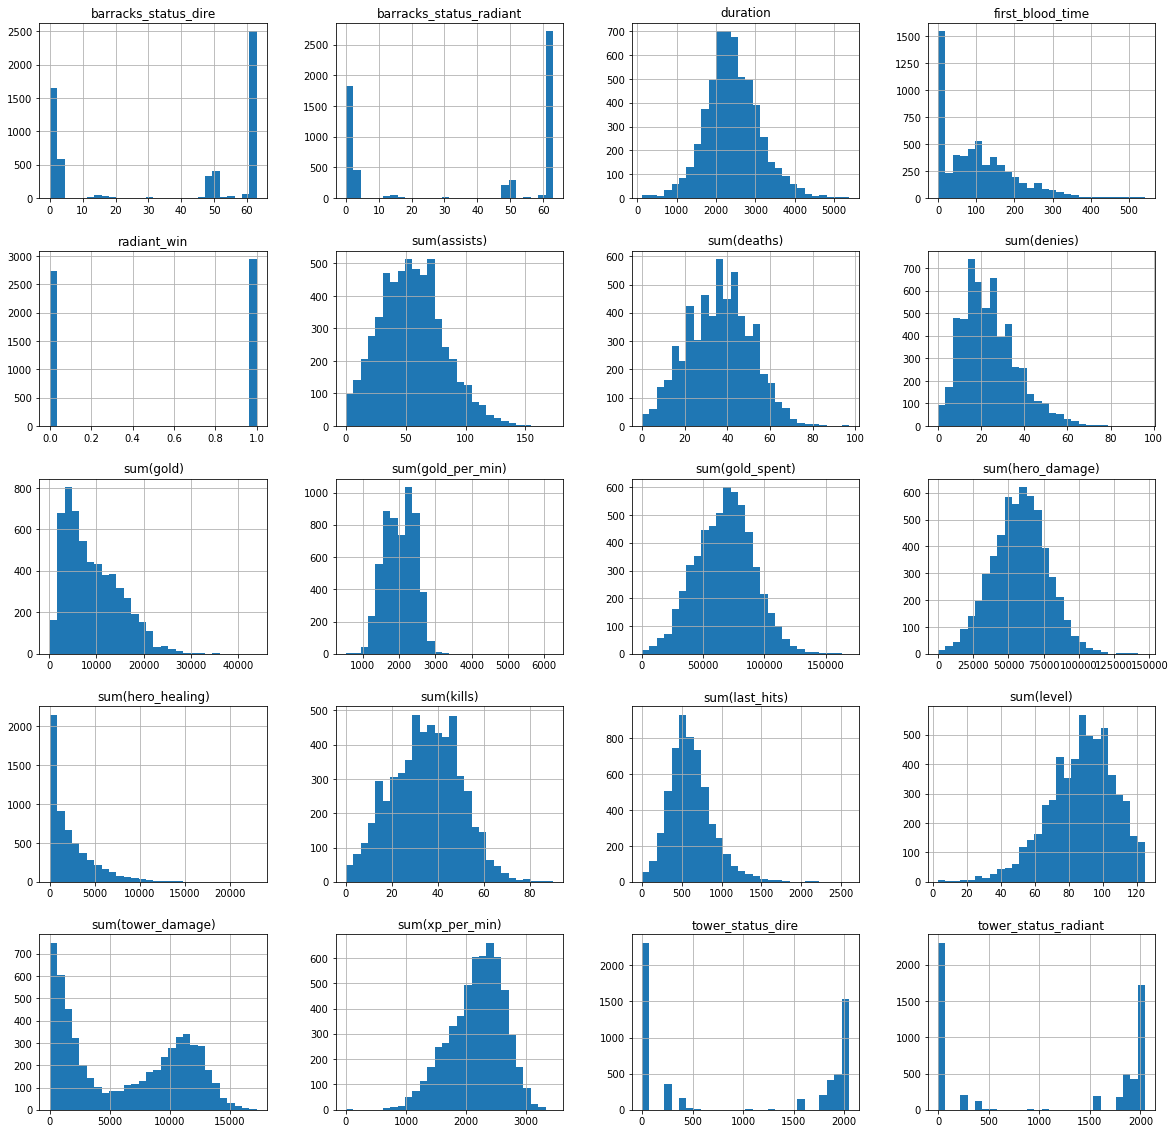

In [38]:
# Não é necessário visualizar o identificador das partidas
df_stats = df.drop(['match_id'], axis=1)

df_stats.hist(figsize=(20,20), bins=28)
plt.show()

Algumas das estatísticas é interessante ver em mais detalhe

### Distribuição das vitórias por time
Aqui podemos ver que a quantidade de vitórias por time é mais ou menos balanceada.

Text(0, 0.5, 'Quantidade de vitórias')

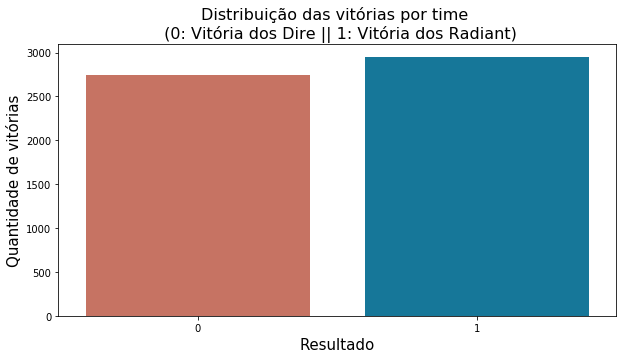

In [10]:
colors = ["#d66853", "#0081af"]
plt.figure(figsize=(10,5))
sns.countplot('radiant_win', data=df, palette=colors)
plt.title('Distribuição das vitórias por time \n (0: Vitória dos Dire || 1: Vitória dos Radiant)', fontsize=16)
plt.xlabel('Resultado', fontsize=15)
plt.ylabel('Quantidade de vitórias', fontsize=15)

### Histograma da duração das partidas

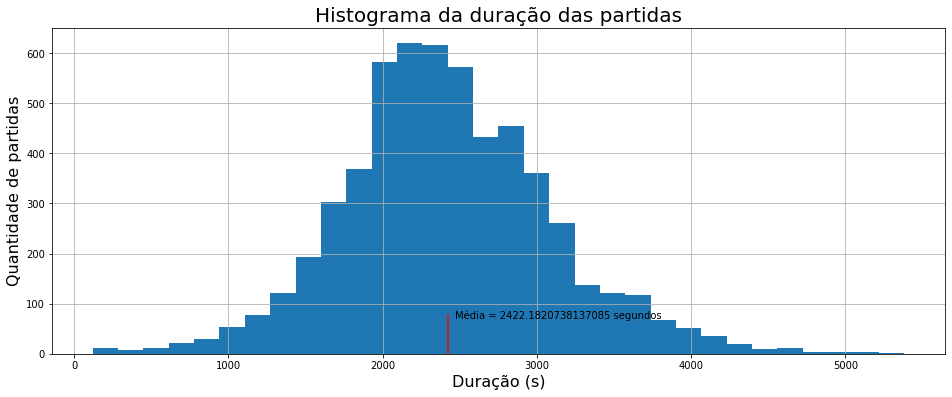

In [33]:
plt.xlabel('Duração (s)', fontsize=16)
plt.ylabel('Quantidade de partidas', fontsize=16)
plt.title('Histograma da duração das partidas', fontsize=20)

media = df['duration'].mean()

plt.vlines(media, 0, 80, color='red')
plt.text(media+50, 70, 'Média = '+str(media)+' segundos')

df['duration'].hist(figsize=(16,6),bins=32)

### Tempo em que acontece o first blood

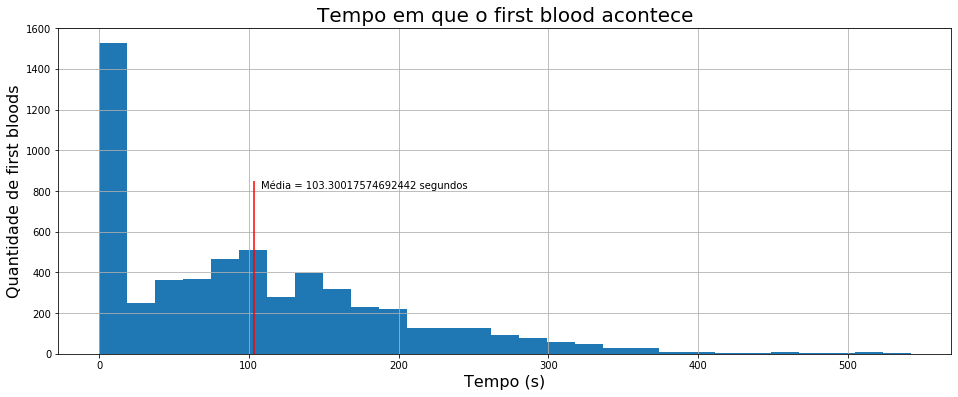

In [32]:
plt.xlabel('Tempo (s)', fontsize=16)
plt.ylabel('Quantidade de first bloods', fontsize=16)
plt.title('Tempo em que o first blood acontece', fontsize=20)

media = df['first_blood_time'].mean()

plt.vlines(media, 0, 850, color='red')
plt.text(media+5, 810, 'Média = '+str(media)+' segundos')

df['first_blood_time'].hist(figsize=(16,6),bins=29)

### Diferenças entre a vitória e derrota

Agora vamos ver como ficam distribuídas as estatísticas dependendo do resultado da partida (vitória e derrota). Separamos o dataset em dois, um apenas com as vitórias e outro apenas com as derrotas.



=================================================== Vitórias ===================================================


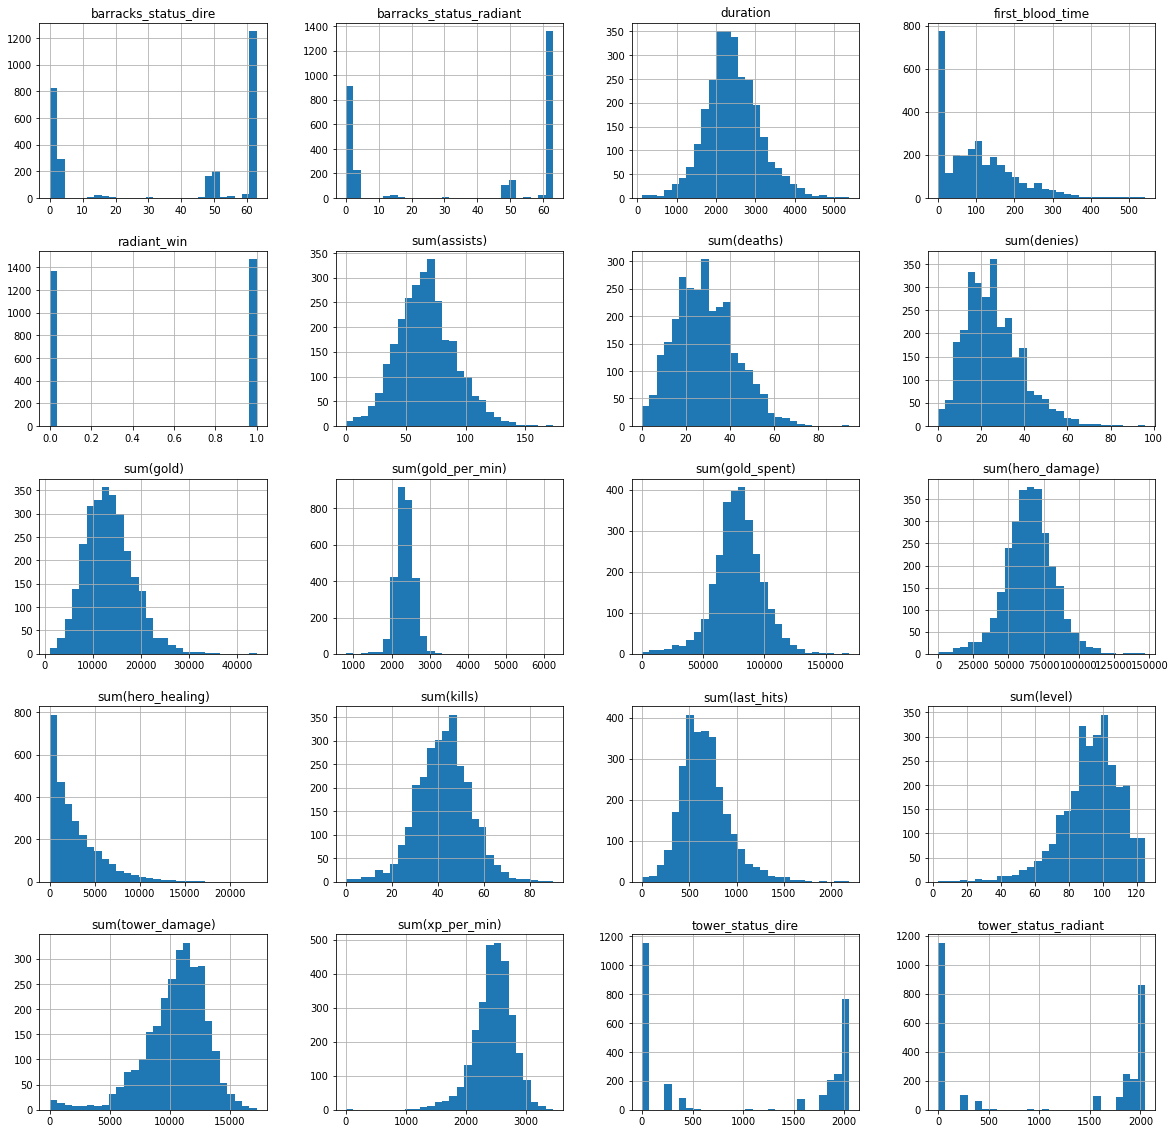



=================================================== Derrotas ===================================================


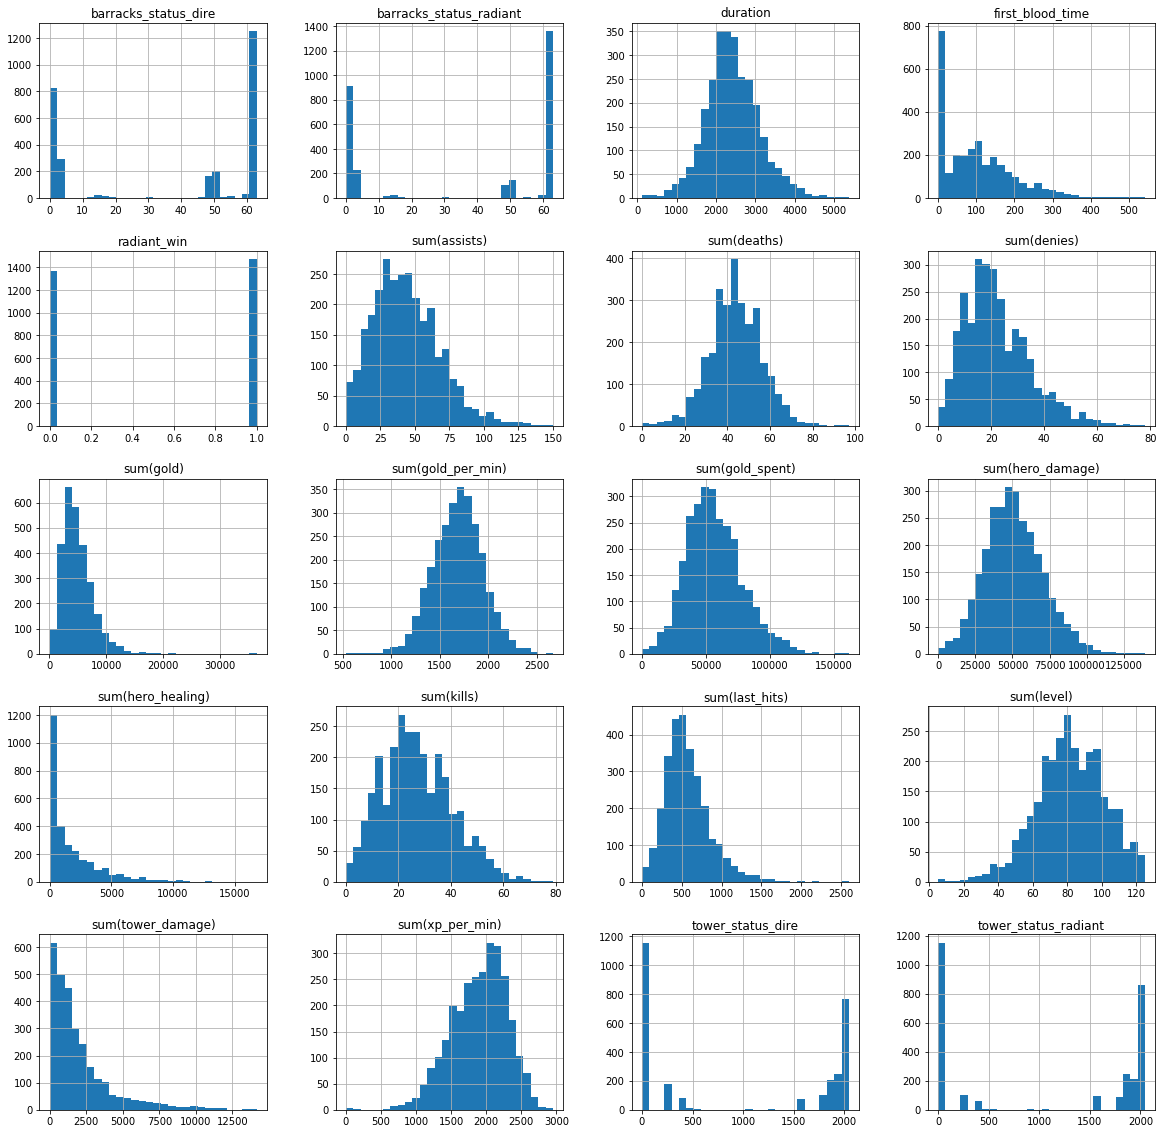

In [55]:
# Dataframe contendo apenas vitórias
df_wins = df[((df.radiant_win == 1) & (df.Team == 'Radiant')) | ((df.radiant_win == 0) & (df.Team == 'Dire'))]

# Dataframe contendo apenas derrotas
df_losses = df[((df.radiant_win == 0) & (df.Team == 'Radiant')) | ((df.radiant_win == 1) & (df.Team == 'Dire'))]

print("\n\n=================================================== Vitórias ===================================================")
df_wins.drop(['match_id'], axis=1).hist(figsize=(20,20), bins=28)
plt.show()
print("\n\n=================================================== Derrotas ===================================================")
df_losses.drop(['match_id'], axis=1).hist(figsize=(20,20), bins=28)
plt.show()

### Conclusão da análise exploratória

Agora que já fizemos uma análise prévia do que está contido no nosso dataset, podemos concluir que os dados mostram claramente várias tendências, que podem ser usadas para se fazer previsões ou classificações, principalmente na diferença entre os dados das vitórias e derrotas, o que significa que temos dados ótimos para realizar nossas análises.

# Vídeo no Youtube 5 minutos

In [56]:
from IPython.display import YouTubeVideo
# YouTubeVideo('2bCCk0xpurE')

# Vargas

### Testes de hipótese podem vir aqui.



# Raydan

### Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)

# Conclusões
Responda sua pergunta pelo menos de forma evidencial.